In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 2.2

In [2]:
class worker():
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def get_grad(self,weight):
        loss = (self.X.dot(weight) - self.y)**2
        grad = 2*(self.X.dot(weight) - self.y)*self.X.T
        return loss, grad

In [3]:
class Server():
    def __init__(self,weight,lr):
        self.weight = weight
        self.lr = lr
        
    def get_weight(self,grad1,grad2,grad3):
        avg_grad = (grad1 + grad2 + grad3)/3
        new_weight = self.weight - self.lr*avg_grad
        self.weight = new_weight

In [4]:
X1 = np.array([-1,2,0])
X2 = np.array([3,0,1])
X3 = np.array([2,-1,3])
y1 = -7
y2 = 5
y3 = 11

worker1 = worker(X1,y1)
worker2 = worker(X2,y2)
worker3 = worker(X3,y3)

In [5]:
weight = np.array([0,0,0])

server = Server(weight,lr=0.1)

In [6]:
log_loss1 = []
log_loss2 = []
log_loss3 = []

for epoch in range(50):
    weight = server.weight
    loss1,grad1 = worker1.get_grad(weight)
    loss2,grad2 = worker2.get_grad(weight)
    loss3,grad3 = worker3.get_grad(weight)
    log_loss1.append(np.log(loss1))
    log_loss2.append(np.log(loss2))
    log_loss3.append(np.log(loss3))
    server.get_weight(grad1,grad2,grad3)

In [7]:
server.weight

array([ 1.00003547, -2.99998829,  1.99996089])

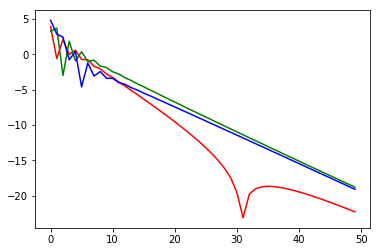

In [8]:
plt.plot(range(50),log_loss1,color='r')
plt.plot(range(50),log_loss2,color='g')
plt.plot(range(50),log_loss3,color='b')

## Problem 2.3 

In [9]:
class TernWorker():
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def get_grad(self,weight):
        loss = (self.X.dot(weight) - self.y)**2
        grad = 2*(self.X.dot(weight) - self.y)*self.X.T
        st = max(abs(grad))
        for i in range(len(grad)):
            if np.random.rand() < (abs(grad[i])/st):
                grad[i] = st*grad[i]/abs(grad[i])
            else:
                grad[i] = 0                
        return loss, grad    

In [10]:
worker1 = TernWorker(X1,y1)
worker2 = TernWorker(X2,y2)
worker3 = TernWorker(X3,y3)

In [11]:
weight = np.array([0,0,0])
server = Server(weight,lr=0.1)

In [12]:
log_loss1 = []
log_loss2 = []
log_loss3 = []

for epoch in range(50):
    weight = server.weight
    loss1,grad1 = worker1.get_grad(weight)
    loss2,grad2 = worker2.get_grad(weight)
    loss3,grad3 = worker3.get_grad(weight)
    log_loss1.append(np.log(loss1))
    log_loss2.append(np.log(loss2))
    log_loss3.append(np.log(loss3))
    server.get_weight(grad1,grad2,grad3)

In [13]:
server.weight

array([ 1.0000064 , -2.99998707,  1.99999032])

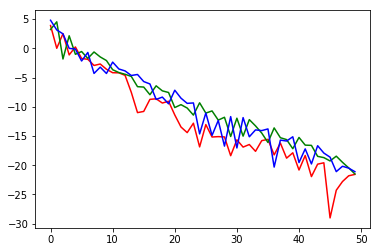

In [14]:
plt.plot(range(50),log_loss1,color='r')
plt.plot(range(50),log_loss2,color='g')
plt.plot(range(50),log_loss3,color='b')

## Problem 2.4

In [15]:
class ClipWorker():
    def __init__(self,X,y,t):
        self.X = X
        self.y = y
        self.t = t
    
    def get_grad(self,weight):
        loss = (self.X.dot(weight) - self.y)**2
        grad = 2*(self.X.dot(weight) - self.y)*self.X.T
        for i in range(len(grad)):
            if abs(grad[i]) > self.t:
                grad[i] = grad[i]/abs(grad[i])*self.t
        return loss, grad 

In [21]:
T = [1,2,5,10]

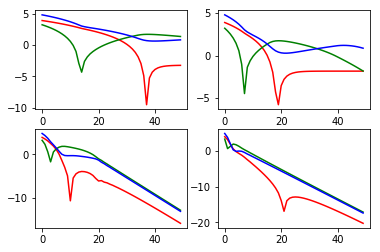

In [22]:
fig,axes = plt.subplots(2,2)


for t in T:
    worker1 = ClipWorker(X1,y1,t)
    worker2 = ClipWorker(X2,y2,t)
    worker3 = ClipWorker(X3,y3,t)
    weight = np.array([0,0,0])
    server = Server(weight,lr=0.1)
    log_loss1 = []
    log_loss2 = []
    log_loss3 = []
    for epoch in range(50):
        weight = server.weight
        loss1,grad1 = worker1.get_grad(weight)
        loss2,grad2 = worker2.get_grad(weight)
        loss3,grad3 = worker3.get_grad(weight)
        log_loss1.append(np.log(loss1))
        log_loss2.append(np.log(loss2))
        log_loss3.append(np.log(loss3))
        server.get_weight(grad1,grad2,grad3)
    index = T.index(t)
    if index < 2:
        axes[0,index].plot(range(50),log_loss1,color='r')
        axes[0,index].plot(range(50),log_loss2,color='g')        
        axes[0,index].plot(range(50),log_loss3,color='b')        
    else:
        axes[1,index-2].plot(range(50),log_loss1,color='r')
        axes[1,index-2].plot(range(50),log_loss2,color='g')        
        axes[1,index-2].plot(range(50),log_loss3,color='b')

## Problem 2.5

In [55]:
class TernClipWorker():
    def __init__(self,X,y,t):
        self.X = X
        self.y = y
        self.t = t
    
    def get_grad(self,weight):
        loss = (self.X.dot(weight) - self.y)**2
        grad = 2*(self.X.dot(weight) - self.y)*self.X.T
        for i in range(len(grad)):
            if abs(grad[i]) > self.t:
                grad[i] = grad[i]/abs(grad[i])*self.t
        st = max(abs(grad))
        for i in range(len(grad)):
            if np.random.rand() < (abs(grad[i])/st):
                grad[i] = st*grad[i]/abs(grad[i])
            else:
                grad[i] = 0
        return loss, grad    

In [56]:
worker1 = TernClipWorker(X1,y1,5)
worker2 = TernClipWorker(X2,y2,5)
worker3 = TernClipWorker(X3,y3,5)

In [57]:
weight = np.array([0,0,0])
server = Server(weight,lr=0.1)

In [58]:
log_loss1 = []
log_loss2 = []
log_loss3 = []
loss1_ = []
loss2_ = []
loss3_ = []

for epoch in range(50):
    weight = server.weight
    loss1,grad1 = worker1.get_grad(weight)
    loss2,grad2 = worker2.get_grad(weight)
    loss3,grad3 = worker3.get_grad(weight)
    loss1_.append(loss1)
    loss2_.append(loss2)
    loss3_.append(loss3)
    log_loss1.append(np.log(loss1))
    log_loss2.append(np.log(loss2))
    log_loss3.append(np.log(loss3))
    server.get_weight(grad1,grad2,grad3)

In [59]:
server.weight

array([ 1.00017457, -3.00006306,  1.99976103])

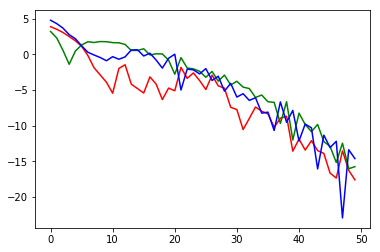

In [60]:
plt.plot(range(50),log_loss1,color='r')
plt.plot(range(50),log_loss2,color='g')
plt.plot(range(50),log_loss3,color='b')

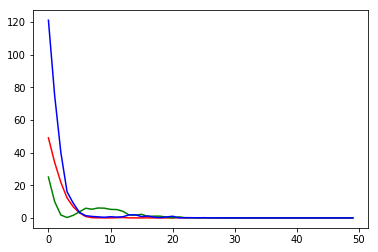

In [62]:
plt.plot(range(50),loss1_,color='r')
plt.plot(range(50),loss2_,color='g')
plt.plot(range(50),loss3_,color='b')